example
matrix types
  adj, lapalacian, related 
  characteristic polynomial - solving determinant by setting to zero- finding eigenvalues of matrix
 weighted matrix - sachs formula to find characteristic polynomial
 
graph characeteristics
 identify isomorphism
 vertex connectivity
 graph diameter
 geodesic
 cheeger constant


In [1]:
import numpy as np
import scipy
import networkx as nx
import pandas as pd
import sympy as sp

### Simple Graph

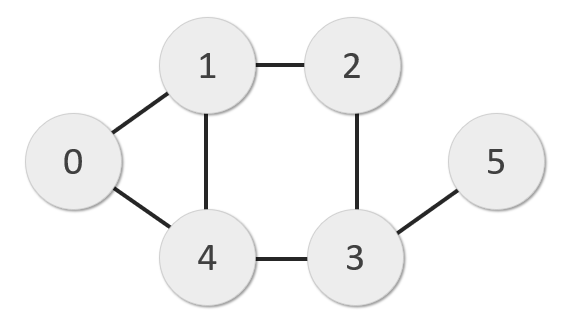

In [2]:
# Labeled Graph
G=nx.Graph()

#add nodes
for i in range(5):
    G.add_node(i)

#edges
G.add_edge(0,1)
G.add_edge(0,4)
G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(3,5)


### Degree Matrix

Diaganol matrix whose values are the degree of a node a index \[i\]\[i\] and zero otherwise

In [3]:
#Degree Matrix
shape=len(G.nodes())
degree_matrix_df = pd.DataFrame(np.zeros((shape, shape)))

node_degrees = G.degree()
for node in node_degrees:
    #node[0] references the node index
    #node[1] references the node degree
    degree_matrix_df.loc[node[0],node[0]]=node[1]

    
print(degree_matrix_df)

     0    1    2    3    4    5
0  2.0  0.0  0.0  0.0  0.0  0.0
1  0.0  3.0  0.0  0.0  0.0  0.0
2  0.0  0.0  2.0  0.0  0.0  0.0
3  0.0  0.0  0.0  3.0  0.0  0.0
4  0.0  0.0  0.0  0.0  3.0  0.0
5  0.0  0.0  0.0  0.0  0.0  1.0


### Adjacency Matrix

Matrix that has a value 1 at index \[i\]\[j\] for every edge connecting nodes i and j, and is zero otherwise.

In [4]:
#Adjacency Matrix
# nx.adjacency_matrix(G)
adjacency_matrix_df=pd.DataFrame(nx.adjacency_matrix(G).toarray())
print(adjacency_matrix_df)



   0  1  2  3  4  5
0  0  1  0  0  1  0
1  1  0  1  0  1  0
2  0  1  0  1  0  0
3  0  0  1  0  1  1
4  1  1  0  1  0  0
5  0  0  0  1  0  0


### Laplacian Matrix

For a simple graph, the Laplacian matrix is defined as 
$L=D-A$

In [89]:
print('The Laplacian calculated from the prior matrices')
print(degree_matrix_df-adjacency_matrix_df)
print('\n')
print('The Laplacian calculated directly from NetworkX')
laplacian_matrix_df=pd.DataFrame(nx.laplacian_matrix(G).toarray())
print(laplacian_matrix_df)

The Laplacian calculated from the prior matrices
     0    1    2    3    4    5
0  2.0 -1.0  0.0  0.0 -1.0  0.0
1 -1.0  3.0 -1.0  0.0 -1.0  0.0
2  0.0 -1.0  2.0 -1.0  0.0  0.0
3  0.0  0.0 -1.0  3.0 -1.0 -1.0
4 -1.0 -1.0  0.0 -1.0  3.0  0.0
5  0.0  0.0  0.0 -1.0  0.0  1.0


The Laplacian calculated directly from NetworkX
   0  1  2  3  4  5
0  2 -1  0  0 -1  0
1 -1  3 -1  0 -1  0
2  0 -1  2 -1  0  0
3  0  0 -1  3 -1 -1
4 -1 -1  0 -1  3  0
5  0  0  0 -1  0  1


### Graph Similarity

Similarity in graphs is defined by the underlying similarity in their underlying matrix representations.  Similar matrices $A$ and $B$ represent identical linear maps given two separate bases.  Similarity is defined as the existance of a change of basis matrix $P$ such that $B=P^{-1}AP$

This can be demonstrated in graph form by relabeling the nodes of the simple graph used earlier, but leaving the edges the same.  In creating the new graph, the edge definitions are changed reflect the changes in nodes. 

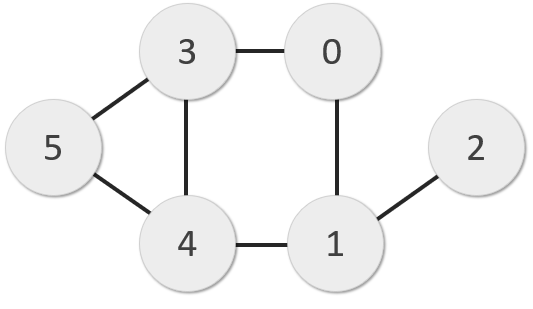

In [90]:
# Labeled Graph
H=nx.Graph()

#add nodes
for i in range(5):
    H.add_node(i)

#edges
H.add_edge(0,1)
H.add_edge(0,3)
H.add_edge(1,2)
H.add_edge(1,4)
H.add_edge(3,4)
H.add_edge(3,5)
H.add_edge(4,5)

### Characteristic Polynomial

The characteristic polynomial of a square matrix is a polynomial which is invariant under matrix similarity whose roots are the eigenvalues of the matrix.  The characteristic polynomial of a graph is the that of its adjacency matrix.

For a matrix $A$, find the polynomial whose zeroes are the eigenvalues of A.  

Given the product of matrix $A$, and some non-zero eigenvector $\mathbf{v}$ results in the product of some scalar eigenvalue $\lambda$ and $\mathbf{v}$

$A\mathbf{v}=\lambda \mathbf{v}$

rearranging

$\left(\lambda I - A\right)\mathbf{v}=0$

The determinant of quantity in the parentheses gives the characteristic polynomial.

$p_A(\lambda)=det\left(\lambda I - A \right)$

In [91]:
M = sp.Matrix(adjacency_matrix_df)
lamda = sp.symbols('lamda')
M.charpoly(lamda)


PurePoly(lamda**6 - 7*lamda**4 - 2*lamda**3 + 8*lamda**2 + 2*lamda - 1, lamda, domain='ZZ')

### Graph Similarity

Graphs are similar if they have the same

- characteristic polynomial
- Determinant
- Trace
- Eigenvalues

Comparing the graphs $G$ and $H$ should result in the same characteristic polynomial.

In [92]:
H_adjacency_matrix_df=pd.DataFrame(nx.adjacency_matrix(H).toarray())
print('Adjacency Matrix of graph G\n')
print(adjacency_matrix_df)
print('\nAdjacency Matrix of graph H\n')
print(H_adjacency_matrix_df)

print('\ncharacteristic polynomial of graph G\n')
M = sp.Matrix(adjacency_matrix_df)
lamda = sp.symbols('lamda')
print(M.charpoly(lamda))

print('\ncharacteristic polynomial of graph H\n')
M = sp.Matrix(H_adjacency_matrix_df)
lamda = sp.symbols('lamda')
print(M.charpoly(lamda))

Adjacency Matrix of graph G

   0  1  2  3  4  5
0  0  1  0  0  1  0
1  1  0  1  0  1  0
2  0  1  0  1  0  0
3  0  0  1  0  1  1
4  1  1  0  1  0  0
5  0  0  0  1  0  0

Adjacency Matrix of graph H

   0  1  2  3  4  5
0  0  1  0  1  0  0
1  1  0  1  0  1  0
2  0  1  0  0  0  0
3  1  0  0  0  1  1
4  0  1  0  1  0  1
5  0  0  0  1  1  0

characteristic polynomial of graph G

PurePoly(lamda**6 - 7*lamda**4 - 2*lamda**3 + 8*lamda**2 + 2*lamda - 1, lamda, domain='ZZ')

characteristic polynomial of graph H

PurePoly(lamda**6 - 7*lamda**4 - 2*lamda**3 + 8*lamda**2 + 2*lamda - 1, lamda, domain='ZZ')


In [93]:
np.linalg.eigvals(adjacency_matrix_df)

array([ 2.53948374, -2.13639304,  1.08247361, -1.20607577, -0.54063225,
        0.2611437 ])

### Huckel Molecular Orbital Theory

In [488]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

#make xyz coord conjugate bond system
from collections import deque
import math
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def create_cyclic_molecule(num_atoms): 
    
    r_outer=2

#     num_atoms=4
    
    x=np.empty(0)
    y=np.empty(0)

    lamda=(2*np.pi)/(num_atoms) #wavelength
    A=1.34 #magnitude

    phi_outer_array=np.arange(0, (2 * np.pi), 2*np.pi/num_atoms)
    for phi_outer in phi_outer_array:
        x=np.append(x, A*np.cos(phi_outer))
        y=np.append(y, A*np.sin(phi_outer))
    return x,y


def create_primary_graph(x,y,graph): 
    for i in range(len(x)):
        graph.add_node(i,
                   x_coord = float(x[i]),
                   y_coord = float(y[i]),
                   z_coord = 0,
                   color = 'white',
                   community_ID = i,
                  )
        
    for i in range(len(x)):
        graph.add_edge(i,(i+1)%len(graph.nodes()))
    return graph
                    
def plot_graph(graph,num_atoms):
    fig_size=6
    marker_size=fig_size*5000/num_atoms

    text = []

    plt.figure(figsize=(fig_size,fig_size))
    ax = plt.axes()
    ax.set_axis_off()
    ax.set_xlim(-1.5*abs(np.amin(x)),1.5*np.amax(x))
    ax.set_ylim(-1.5*abs(np.amin(y)),1.5*np.amax(y))
#     plt.scatter(x,y, s=marker_size)

    for i in range(len(graph.nodes())):
        ax.scatter(
            graph.nodes[i]['x_coord'],
            graph.nodes[i]['y_coord'],
            color= graph.nodes[i]['color'],
            edgecolors='black',
            s=marker_size,
            zorder=3
        )

        #annotate nodes with community ID number            
        text.append( ax.text(
            graph.nodes[i]['x_coord'],
            graph.nodes[i]['y_coord'],
            list(graph.nodes())[i],
            ha='center', va='center'
        ))
    
    #plot graph edges as line segments
    segments=deque()
    for i in range(len(graph.edges())):
        u=list(graph.edges)[i][0]
        v=list(graph.edges)[i][1]
        segment=[(
            graph.nodes[u]['x_coord'],
            graph.nodes[u]['y_coord']),(
            graph.nodes[v]['x_coord'],
            graph.nodes[v]['y_coord']
        )]
        segments.append(segment)

    lc = LineCollection(segments, colors='dimgray',linestyle='--')
    ax.add_collection(lc)

def create_system(num_atoms,graph):
    graph=nx.Graph()
    x,y = create_cyclic_molecule(num_atoms)
    graph=create_primary_graph(x,y,graph)
    plot_graph(graph,num_atoms)
    return num_atoms,graph
    


G=nx.Graph()
num_atoms = interactive(create_system, graph=fixed(G), num_atoms=widgets.IntSlider(min=4, max=10, step=2, value=6))

display(num_atoms)


interactive(children=(IntSlider(value=6, description='num_atoms', max=10, min=4, step=2), Output()), _dom_clas…

In [489]:
alpha = sp.symbols('alpha')

def kronecker_delta(i,j):
    if i == j:
        return 1
    else:
        return 0

dim=num_atoms.result[0]
on_site_energy_matrix = sp.Matrix(dim,dim,kronecker_delta)*alpha
on_site_energy_matrix

Matrix([
[alpha,     0,     0,     0,     0,     0],
[    0, alpha,     0,     0,     0,     0],
[    0,     0, alpha,     0,     0,     0],
[    0,     0,     0, alpha,     0,     0],
[    0,     0,     0,     0, alpha,     0],
[    0,     0,     0,     0,     0, alpha]])

In [490]:
beta = sp.symbols('beta')

G=num_atoms.result[1]
nearest_neighbors_energy_matrix=sp.Matrix(nx.adjacency_matrix(G).toarray())*beta
nearest_neighbors_energy_matrix

Matrix([
[   0, beta,    0,    0,    0, beta],
[beta,    0, beta,    0,    0,    0],
[   0, beta,    0, beta,    0,    0],
[   0,    0, beta,    0, beta,    0],
[   0,    0,    0, beta,    0, beta],
[beta,    0,    0,    0, beta,    0]])

In [491]:
huckel_matrix = on_site_energy_matrix + nearest_neighbors_energy_matrix
huckel_matrix

Matrix([
[alpha,  beta,     0,     0,     0,  beta],
[ beta, alpha,  beta,     0,     0,     0],
[    0,  beta, alpha,  beta,     0,     0],
[    0,     0,  beta, alpha,  beta,     0],
[    0,     0,     0,  beta, alpha,  beta],
[ beta,     0,     0,     0,  beta, alpha]])

In [492]:
E_vals=sp.Matrix([huckel_matrix.eigenvals(multiple=True)])
E_vals

Matrix([[alpha + beta, alpha + beta, alpha - 2*beta, alpha - beta, alpha - beta, alpha + 2*beta]])

In [493]:
E_vecs=sp.Matrix([huckel_matrix.eigenvects()])
E_vecs

Matrix([[(alpha - 2*beta, 1, [Matrix([
[-1],
[ 1],
[-1],
[ 1],
[-1],
[ 1]])]), (alpha - beta, 2, [Matrix([
[-1],
[ 1],
[ 0],
[-1],
[ 1],
[ 0]]), Matrix([
[-1],
[ 0],
[ 1],
[-1],
[ 0],
[ 1]])]), (alpha + beta, 2, [Matrix([
[-1],
[-1],
[ 0],
[ 1],
[ 1],
[ 0]]), Matrix([
[ 1],
[ 0],
[-1],
[-1],
[ 0],
[ 1]])]), (alpha + 2*beta, 1, [Matrix([
[1],
[1],
[1],
[1],
[1],
[1]])])]])

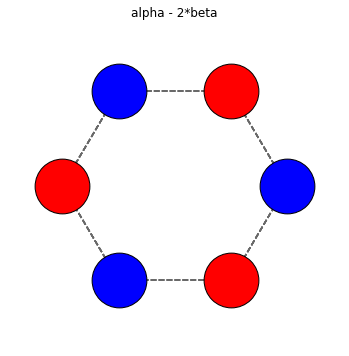

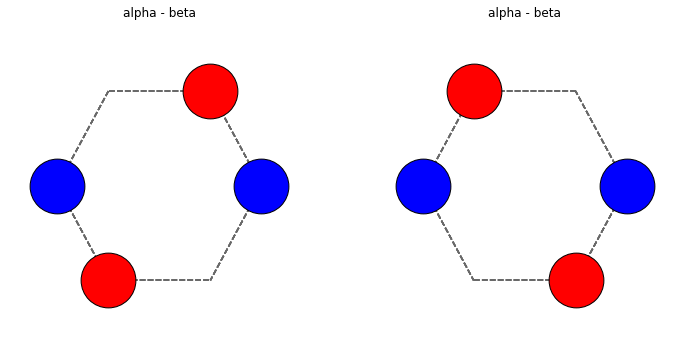

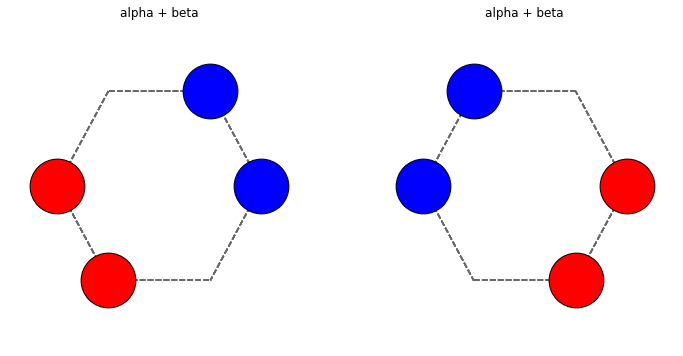

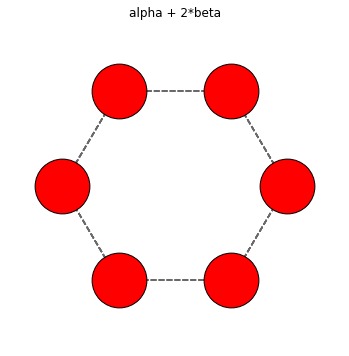

In [494]:
def plot_graphs(graph,dim):
    fig_size=6
    marker_size=fig_size*500

    num_E_vecs=len(E_vecs)

    degeneracy=np.empty(0)
    for i in range(len(E_vecs)):
        degeneracy=np.append(degeneracy, E_vecs[i][1])

    for vec_index, E_vec in enumerate(E_vecs):
        cols=int(degeneracy[vec_index])
        fig, axs = plt.subplots(1,cols,figsize=(6*cols,6))
#         axs.set_xlim(-2,2)
#         axs.set_ylim(-2,2)

        for col in range(cols):
        
            #plot graph edges as line segments
            segments=deque()
            for i in range(len(graph.edges())):
                u=list(graph.edges)[i][0]
                v=list(graph.edges)[i][1]
                segment=[(
                    graph.nodes[u]['x_coord'],
                    graph.nodes[u]['y_coord']),(
                    graph.nodes[v]['x_coord'],
                    graph.nodes[v]['y_coord']
                )]
                segments.append(segment)

            lc = LineCollection(segments, colors='dimgray',linestyle='--')
            
            for i in range(len(graph.nodes())):
                
                vec_i=float(E_vec[2][0+col][i])

                if (vec_i>0):
                    color='red'
                else:
                    color='blue'
                    
                if cols<2:
                    axs.set_axis_off()
                    axs.set_xlim(-2,2)
                    axs.set_ylim(-2,2)
                    axs.set_title(E_vec[0])
                    axs.add_collection(lc)
                    axs.scatter(
                    graph.nodes[i]['x_coord'],
                    graph.nodes[i]['y_coord'],
                    color=color,
                    edgecolors='black',
                    s=marker_size*abs(vec_i),
                    zorder=3)
                else:
                    axs[col].set_axis_off()
                    axs[col].set_xlim(-2,2)
                    axs[col].set_ylim(-2,2)
                    axs[col].set_title(E_vec[0])
                    axs[col].add_collection(lc)
                    axs[col].scatter(
                    graph.nodes[i]['x_coord'],
                    graph.nodes[i]['y_coord'],
                    color=color,
                    edgecolors='black',
                    s=marker_size*abs(vec_i),
                    zorder=3
                    )
                
                
                        
plot_graphs(G,dim)


In [486]:
def plot_graph(graph,num_atoms):
    fig_size=6
    marker_size=fig_size*5000/num_atoms

    text = []

    plt.figure(figsize=(fig_size,fig_size))
    ax = plt.axes()
    ax.set_axis_off()
    ax.set_xlim(-1.5*abs(np.amin(x)),1.5*np.amax(x))
    ax.set_ylim(-1.5*abs(np.amin(y)),1.5*np.amax(y))
#     plt.scatter(x,y, s=marker_size)

    for i in range(len(graph.nodes())):
        ax.scatter(
            graph.nodes[i]['x_coord'],
            graph.nodes[i]['y_coord'],
            color= graph.nodes[i]['color'],
            edgecolors='black',
            s=marker_size,
            zorder=3
        )

        #annotate nodes with community ID number            
        text.append( ax.text(
            graph.nodes[i]['x_coord'],
            graph.nodes[i]['y_coord'],
            list(graph.nodes())[i],
            ha='center', va='center'
        ))
    
    #plot graph edges as line segments
    segments=deque()
    for i in range(len(graph.edges())):
        u=list(graph.edges)[i][0]
        v=list(graph.edges)[i][1]
        segment=[(
            graph.nodes[u]['x_coord'],
            graph.nodes[u]['y_coord']),(
            graph.nodes[v]['x_coord'],
            graph.nodes[v]['y_coord']
        )]
        segments.append(segment)

    lc = LineCollection(segments, colors='dimgray',linestyle='--')
    ax.add_collection(lc)
